<a href="https://colab.research.google.com/github/jumafernandez/dsII/blob/main/Correlaci%C3%B3n_entre_variables_(an%C3%A1lisis_bivariado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis bivariado: Análisis de correlación

En términos generales el análisis bivariado es la investigación de la relación entre dos conjuntos de datos, como pares de observaciones tomadas de una misma muestra o individuo.

Las correlaciones bivariadas son herramientas de amplia aplicación y se utilizan para estudiar cómo una variable influye en la otra.

En el marco de esta notebook, vamos a abordar el análisis de correlación entre los siguientes tipos de datos:
- Categóricos vs categóricos (dicotómicos),
- Categóricos vs categóricos,
- Ordinales vs ordinales,
- Numéricos vs numéricos.

## Categóricos vs Categóricos (dicotómicos)

Para ello vamos a utilizar el __Coeficiente Phi (Φ)__, que consiste en una medida similar al coeficiente de correlación de Pearson, pero se aplica a tablas de contingencia de 2x2.

Esta tabla de contingencia organiza las frecuencias de las combinaciones posibles de las dos variables.

Tomemos un ejemplo respecto a personas para las cuales tenemos dos atributos: si son fumadoras y si poseen enfermedades cardíacas:
<br />

|Fuma|Enfermedad cardíaca (Sí)|Enfermedad cardíaca (No)|Total|
|--------|--------|--------|--------|
|Fuma (Sí)|65|5|__70__|
Fuma (No)|5|25|__30__|
|__Total__|__70__|__30__|__100__|


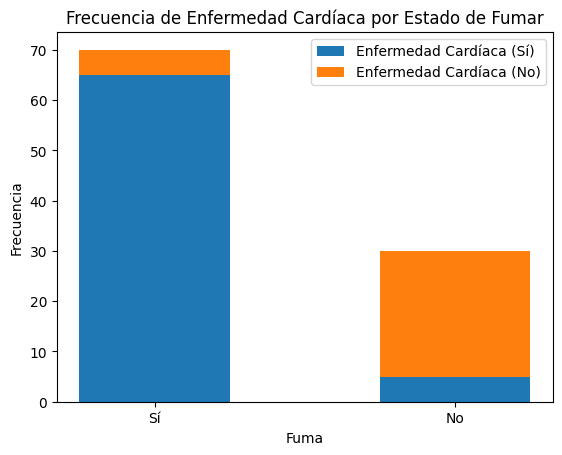

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Datos de la tabla de contingencia 2x2
tabla = np.array([
    [65, 5],  # Fuma (Sí) y Enfermedad cardíaca (Sí, No)
    [5, 25]   # Fuma (No) y Enfermedad cardíaca (Sí, No)
])

# Etiquetas para los ejes
labels_fuma = ['Sí', 'No']
labels_enfermedad = ['Enfermedad Cardíaca (Sí)', 'Enfermedad Cardíaca (No)']

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots()

bar_width = 0.5
index = np.arange(len(labels_fuma))

bar1 = ax.bar(index, tabla[:, 0], bar_width, label=labels_enfermedad[0])
bar2 = ax.bar(index, tabla[:, 1], bar_width, bottom=tabla[:, 0], label=labels_enfermedad[1])

ax.set_xlabel('Fuma')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Enfermedad Cardíaca por Estado de Fumar')
ax.set_xticks(index)
ax.set_xticklabels(labels_fuma)
ax.legend()

plt.show()

### Fórmula de Φ
El coeficiente Phi (Φ) se calcula usando la siguiente fórmula para una tabla de contingencia 2x2:

$$
\phi = \frac{ad - bc}{\sqrt{(a+b)(c+d)(a+c)(b+d)}}
$$
donde:
- $a, b, c, d$: Son las frecuencias observadas en cada celda de la tabla de contingencia.
- $(a+b), (c+d), (a+c), (b+d)$: Son los totales marginales para cada fila y columna.
<br /> <br />

Si las categorías de A y B están fuertemente asociadas, es esperable que $ad$ sea grande y $bc$ sea pequeño, lo que da un numerador positivo y grande. Si no hay asociación, $ad$ y $bc$ deberían ser aproximadamente iguales, lo que resultaría en un numerador cercano a cero.
Por su parte, el denominador es una normalización basada en los totales marginales de la tabla que asegura que la fórmula varíe entre -1 y 1.

### Interpretación de Φ
- Φ = 0: Indica que no hay asociación entre las dos variables (son independientes).
- Φ = 1 o Φ = -1: Indica una asociación perfecta positiva o negativa, respectivamente.

Aplicando la fórmula del __Coeficiente Phi (Φ)__ en Python, obtenemos lo siguiente:

In [21]:
import numpy as np

# Calcular el numerador (ad - bc)
numerador = (tabla[0][0] * tabla[1][1]) - (tabla[0][1] * tabla[1][0])

# Calcular el denominador √((a+b)(c+d)(a+c)(b+d))
denominador = np.sqrt((tabla[0][0] + tabla[0][1]) * (tabla[1][0] + tabla[1][1]) * (tabla[0][0] + tabla[1][0]) * (tabla[0][1] + tabla[1][1]))

# Calcular Phi
phi = numerador / denominador

print(f"Coeficiente de Phi: {phi:.4f}")


Coeficiente de Phi: 0.7619


## Categóricos vs Categóricos

Para analizar la relación entre dos variables categóricas que no son necesariamente dicotómicas, utilizaremos el **Coeficiente de Cramer’s V**, que es una medida de asociación similar al coeficiente Phi, pero es adecuada para tablas de contingencia de cualquier tamaño (no solo 2x2).

### Ejemplo

Tomemos un ejemplo en el que investigamos la relación entre el nivel educativo y el tipo de empleo. Supongamos que tenemos la siguiente tabla de contingencia:
<br />

|                | Empleo Administrativo | Empleo Técnico | Empleo Directivo | Total |
|----------------|-----------------------|----------------|------------------|-------|
| **Primaria**   | 25                    | 15             | 5                | 45    |
| **Secundaria** | 10                    | 30             | 5                | 45    |
| **Universitaria**| 0                    | 5              | 30               | 35    |
| **Total**      | 35                    | 50             | 40               | 125   |

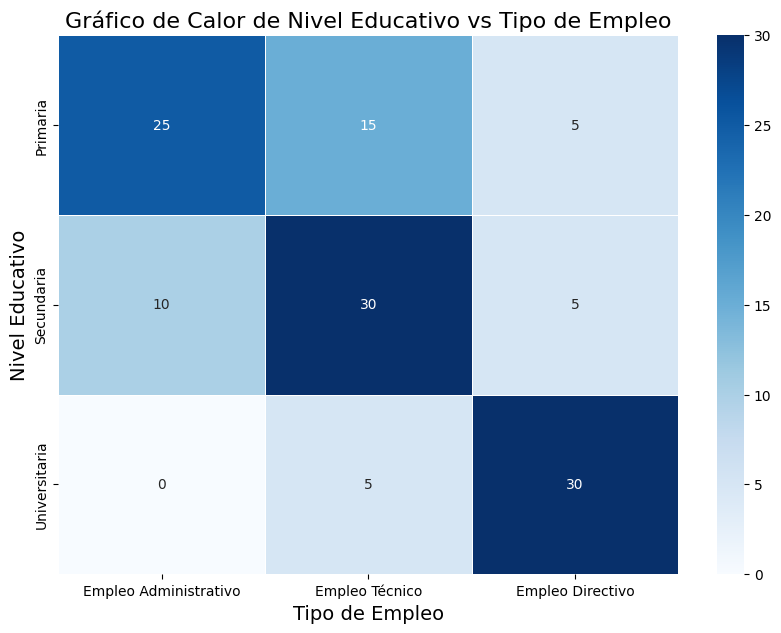

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Datos de la tabla ajustada
tabla = np.array([
    [25, 15, 5],
    [10, 30, 5],
    [0, 5, 30]
])

# Convertir la tabla a un diccionario
categorias = ['Primaria', 'Secundaria', 'Universitaria']
empleos = ['Empleo Administrativo', 'Empleo Técnico', 'Empleo Directivo']

# Crear un DataFrame para el gráfico de calor
df = pd.DataFrame(tabla, columns=empleos, index=categorias)

# Crear el gráfico de calor
plt.figure(figsize=(10, 7))
sns.heatmap(df, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Gráfico de Calor de Nivel Educativo vs Tipo de Empleo', fontsize=16)
plt.xlabel('Tipo de Empleo', fontsize=14)
plt.ylabel('Nivel Educativo', fontsize=14)
plt.show()

### Fórmula de Cramer’s V

El coeficiente de Cramer’s V se calcula usando la siguiente fórmula:

$$
V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}}
$$

donde:
- $\chi^2$: Es el valor del estadístico chi-cuadrado calculado a partir de la tabla de contingencia.
- $n$: Es el número total de observaciones.
- $k$: Es el número de columnas (categorías de la segunda variable).
- $r$: Es el número de filas (categorías de la primera variable).
- $min(k-1, r-1)$: Es el menor valor entre \(k-1\) y \(r-1\), que actúa como un factor de ajuste para tablas no cuadradas.

### Interpretación de Cramer’s V
- $V = 0$: Indica que no hay asociación entre las variables (son independientes).
- $0 < V \leq 1$: Cuanto más cercano esté $V$ a 1, mayor será la asociación entre las variables. Un valor cercano a 1 indica una fuerte asociación.

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

# Cálculo de Cramer's V
n = tabla.sum()  # Total de observaciones
phi2 = chi2 / n
k = min(tabla.shape) - 1
cramer_v = np.sqrt(phi2 / k)

print(f"Cramer's V: {cramer_v:.3f}")


Cramer's V: 0.568


### ¿Qué es el Estadístico Chi-cuadrado $\chi^2$?

El estadístico chi-cuadrado es una medida de la diferencia entre las frecuencias observadas y las frecuencias esperadas en una tabla de contingencia. Es una herramienta utilizada para determinar si existe una asociación significativa entre dos variables categóricas.

### Cálculo del Estadístico Chi-cuadrado

1. **Frecuencias Observadas**: Son los valores reales que se cuentan en cada celda de la tabla de contingencia.

2. **Frecuencias Esperadas**: Son los valores que se esperarían en cada celda si no hubiera asociación entre las variables. Se calculan usando la fórmula:

   $$
   E_{ij} = \frac{(F_{i\text{total}} \cdot F_{\text{jtotal}})}{N}
   $$

   donde:
   - $E_{ij}$ es la frecuencia esperada en la celda $(i, j)$.
   - $F_{i\text{total}}$ es el total de la fila $(i)$.
   - $F_{\text{jtotal}}$ es el total de la columna $(j)$.
   - $N$ es el número total de observaciones.

3. **Cálculo de \(\chi^2\)**: La fórmula para el estadístico chi-cuadrado es:

   $$
   \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
   $$

   donde:
   - $O_{ij}$ es la frecuencia observada en la celda $(i, j)$.
   - $E_{ij}$ es la frecuencia esperada en la celda $(i, j)$.
   - La suma se realiza sobre todas las celdas de la tabla de contingencia.

### Interpretación del Valor de \(\chi^2\)

El valor obtenido para $\chi^2$ se compara con una distribución chi-cuadrado con los grados de libertad adecuados para determinar si la asociación entre las variables es estadísticamente significativa.

- **Grados de libertad** para una tabla de contingencia de $r \times k$ es $(r-1) \times (k-1)$. En este caso, con una tabla 2x2, los grados de libertad son $(2-1) \times (2-1) = 1 $.

Usamos este valor para encontrar el valor p asociado y determinar si la asociación es significativa a un nivel de confianza deseado (por ejemplo, 0.05).

## Ordinales vs Ordinales

Para analizar la relación entre dos variables ordinales, utilizamos el __Coeficiente de Correlación de Spearman__, que mide la fuerza y dirección de la asociación entre dos variables ordinales.

El coeficiente de Spearman es una medida no paramétrica que evalúa cómo se relacionan las posiciones relativas (rangos) de las dos variables.

### Fórmula de Spearman

El coeficiente de correlación de Spearman $(\rho)$ se calcula usando la fórmula:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

donde:
- $d_i$ es la diferencia entre los rangos de cada par de observaciones.
- $n$ es el número total de pares de observaciones.

<br />

### Cálculo Paso a Paso

1. **Asignar Rangos**: Asigna un rango a cada valor en las dos variables ordinales. Los valores más bajos obtienen rangos más bajos, y los valores más altos obtienen rangos más altos.

2. **Calcular las Diferencias de Rangos**: Para cada par de observaciones, calcula la diferencia entre los rangos asignados.

3. **Sumar los Cuadrados de las Diferencias de Rangos**: Suma los cuadrados de las diferencias de rangos.

4. **Aplicar la Fórmula de Spearman**: Sustituye los valores en la fórmula de Spearman para obtener el coeficiente.

### Ejemplo

Consideremos el siguiente conjunto de datos con variables ordinales:

- **Nivel Educativo** (1 = Primaria, 2 = Secundaria, 3 = Terciaria, 4 = Universitaria)
- **Tipo de Empleo** (1 = No calificado, 2 = Semi-calificado, 3 = Calificado, 4 = Profesional)

Los datos son los siguientes:

| Persona | Nivel Educativo | Tipo de Empleo |
|---------|-----------------|----------------|
| 1       | Secundaria (2)  | No calificado (1) |
| 2       | Universitaria (4)| Profesional (4)  |
| 3       | Terciaria (3)   | Calificado (3)    |
| 4       | Primaria (1)    | Semi-calificado (2)|
| 5       | Secundaria (2)  | Semi-calificado (2)|
| 6       | Terciaria (3)   | Calificado (3)    |

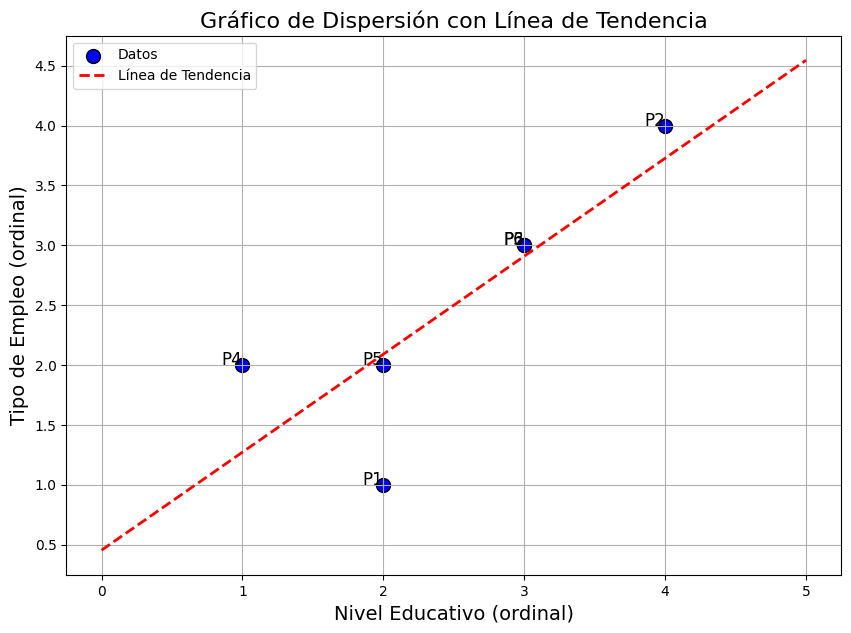

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
personas = [1, 2, 3, 4, 5, 6]
nivel_educativo = np.array([2, 4, 3, 1, 2, 3])  # Secundaria, Universitaria, Terciaria, Primaria, Secundaria, Terciaria
tipo_empleo = np.array([1, 4, 3, 2, 2, 3])       # No calificado, Profesional, Calificado, Semi-calificado, Semi-calificado, Calificado

# Calcular la regresión lineal
coeficientes = np.polyfit(nivel_educativo, tipo_empleo, 1)
polinomio = np.poly1d(coeficientes)
x = np.linspace(nivel_educativo.min() - 1, nivel_educativo.max() + 1, 100)
y = polinomio(x)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 7))
plt.scatter(nivel_educativo, tipo_empleo, color='blue', s=100, edgecolor='k', label='Datos')
plt.plot(x, y, color='red', linestyle='--', linewidth=2, label='Línea de Tendencia')

# Etiquetar los puntos
for i, txt in enumerate(personas):
    plt.annotate(f'P{txt}', (nivel_educativo[i], tipo_empleo[i]), fontsize=12, ha='right')

plt.title('Gráfico de Dispersión con Línea de Tendencia', fontsize=16)
plt.xlabel('Nivel Educativo (ordinal)', fontsize=14)
plt.ylabel('Tipo de Empleo (ordinal)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### Asignación de Rangos

Asignamos rangos a cada valor en las variables ordinales:

- **Nivel Educativo**:
  - Primaria = 1
  - Secundaria = 2
  - Terciaria = 3
  - Universitaria = 4

- **Tipo de Empleo**:
  - No calificado = 1
  - Semi-calificado = 2
  - Calificado = 3
  - Profesional = 4

Los rangos para cada persona son:

| Persona | Nivel Educativo | Rango Nivel Educativo | Tipo de Empleo | Rango Tipo de Empleo |
|---------|-----------------|-----------------------|----------------|----------------------|
| 1       | Secundaria (2)  | 2                     | No calificado (1) | 1                    |
| 2       | Universitaria (4)| 4                    | Profesional (4)  | 4                    |
| 3       | Terciaria (3)   | 3                     | Calificado (3)    | 3                    |
| 4       | Primaria (1)    | 1                     | Semi-calificado (2)| 2                    |
| 5       | Secundaria (2)  | 2                     | Semi-calificado (2)| 2                    |
| 6       | Terciaria (3)   | 3                     | Calificado (3)    | 3                    |


### Calcular las Diferencias de Rangos y sus Cuadrados

Para cada persona, calculamos la diferencia entre los rangos y sus cuadrados:

| Persona | Rango Nivel Educativo | Rango Tipo de Empleo | \(d_i\) (Diferencia) | \(d_i^2\) (Cuadrado) |
|---------|-----------------------|----------------------|---------------------|----------------------|
| 1       | 2                     | 1                    | 1                   | 1                    |
| 2       | 4                     | 4                    | 0                   | 0                    |
| 3       | 3                     | 3                    | 0                   | 0                    |
| 4       | 1                     | 2                    | -1                  | 1                    |
| 5       | 2                     | 2                    | 0                   | 0                    |
| 6       | 3                     | 3                    | 0                   | 0                    |

Sumamos los cuadrados de las diferencias:

$$
\sum d_i^2 = 1 + 0 + 0 + 1 + 0 + 0 = 2
$$

### Aplicar la Fórmula de Spearman

Usamos la fórmula del coeficiente de Spearman:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

donde:
- $(\sum d_i^2 = 2)$
- $(n = 6)$ (número de observaciones)

Sustituimos en la fórmula:

$$
\rho = 1 - \frac{6 \times 2}{6 \times (6^2 - 1)} = 1 - \frac{12}{6 \times 35} = 1 - \frac{12}{210} \approx 1 - 0.0571 = 0.9429
$$

### Interpretación de Spearman

- $\rho \approx 0.94$: Indica una correlación positiva fuerte entre el nivel educativo y el tipo de empleo. A medida que aumenta el nivel educativo, es probable que también aumente el nivel del tipo de empleo.

In [6]:
from scipy.stats import spearmanr

# Datos de ejemplo
nivel_educativo = [1, 2, 3, 4, 2, 3, 4, 1]
tipo_empleo = [1, 2, 3, 4, 2, 3, 4, 1]

# Calcular el coeficiente de Spearman
rho, p_value = spearmanr(nivel_educativo, tipo_empleo)

print(f"Coeficiente de Spearman: {rho}")
print(f"Valor p: {p_value}")

Coeficiente de Spearman: 1.0
Valor p: 0.0


## Numéricos vs Numéricos

Para analizar la relación entre dos variables numéricas, como la __Edad__ y el __Salario__, podemos utilizar el __Coeficiente de Correlación de Pearson__. Este coeficiente mide la fuerza y dirección de la relación lineal entre dos variables numéricas.

### Ejemplo de Datos

Consideremos el siguiente conjunto de datos con variables numéricas:

- **Edad** (en años)
- **Salario** (en miles de dólares)

Los datos son los siguientes:

| Persona | Edad | Salario |
|---------|------|---------|
| 1       | 25   | 30      |
| 2       | 30   | 35      |
| 3       | 35   | 40      |
| 4       | 40   | 45      |
| 5       | 45   | 50      |
| 6       | 50   | 55      |

### Calcular el Coeficiente de Correlación de Pearson

El coeficiente de correlación de Pearson se calcula utilizando la siguiente fórmula:

$$
r = \frac{n \sum xy - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}}
$$

donde:
- $x$ y $y$ son las dos variables numéricas.
- $\sum xy$ es la suma de los productos de $x$ e $y$.
- $\sum x$ y $\sum y$ son las sumas de $x$ e $y$, respectivamente.
- $\sum x^2$ y $\sum y^2$ son las sumas de los cuadrados de $x$ e $y$, respectivamente.
- $n$ es el número total de observaciones.

### Cálculo Paso a Paso

1. **Sumas Necesarias:**

   - $\sum x = 25 + 30 + 35 + 40 + 45 + 50 = 225$
   - $\sum y = 30 + 35 + 40 + 45 + 50 + 55 = 255$
   - $\sum x^2 = 25^2 + 30^2 + 35^2 + 40^2 + 45^2 + 50^2 = 625 + 900 + 1225 + 1600 + 2025 + 2500 = 9150$
   - $\sum y^2 = 30^2 + 35^2 + 40^2 + 45^2 + 50^2 + 55^2 = 900 + 1225 + 1600 + 2025 + 2500 + 3025 = 11525$
   - $\sum xy = (25 \times 30) + (30 \times 35) + (35 \times 40) + (40 \times 45) + (45 \times 50) + (50 \times 55) = 750 + 1050 + 1400 + 1800 + 2250 + 2750 = 10100$

2. **Sustitución en la Fórmula:**

   Usamos $n = 6$:

   $$
   r = \frac{6 \times 10100 - (225 \times 255)}{\sqrt{[6 \times 9150 - 225^2][6 \times 11525 - 255^2]}}
   $$

   Calculando los valores:

   $$
   r = \frac{60600 - 57375}{\sqrt{[54900 - 50625][69150 - 65025]}}
   $$

   $$
   r = \frac{3235}{\sqrt{4275 \times 4125}} \approx \frac{3235}{\sqrt{17671875}} \approx \frac{3235}{4205.89} \approx 0.77
   $$

### Interpretación de Pearson

- $r \approx 0.77$: Indica una correlación positiva fuerte entre la edad y el salario. A medida que aumenta la edad, es probable que también aumente el salario.

In [40]:
from scipy.stats import pearsonr

# Datos de ejemplo
edad = [25, 25, 27, 41, 42, 60]
salario = [30, 35, 40, 45, 50, 55]

# Calcular el coeficiente de Pearson
r, p_value = pearsonr(edad, salario)

print(f"Coeficiente de Pearson: {r}")

Coeficiente de Pearson: 0.9271086461160545


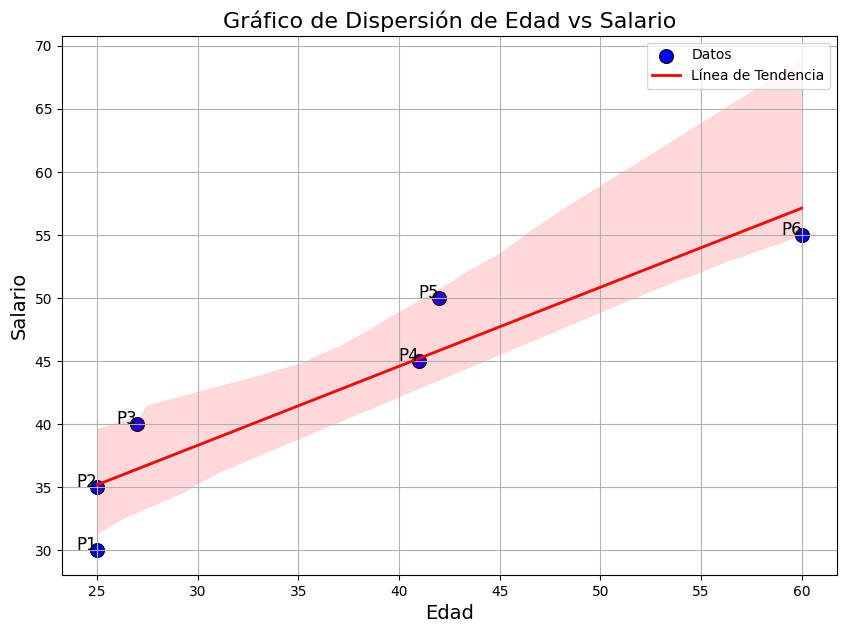

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Datos
data = {
    'Persona': [1, 2, 3, 4, 5, 6],
    'Edad': [25, 25, 27, 41, 42, 60],
    'Salario': [30, 35, 40, 45, 50, 55]
}

df = pd.DataFrame(data)

# Crear el gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Edad', y='Salario', data=df, color='blue', s=100, edgecolor='k', label='Datos')
sns.regplot(x='Edad', y='Salario', data=df, scatter=False, color='red', line_kws={'linewidth': 2}, label='Línea de Tendencia')

# Etiquetar los puntos
for i in range(len(df)):
    plt.text(df['Edad'][i], df['Salario'][i], f'P{i+1}', fontsize=12, ha='right', color='black')

plt.title('Gráfico de Dispersión de Edad vs Salario', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Salario', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
